In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.15.4
matplotlib: 3.0.2
pandas: 0.23.4
sklearn: 0.20.1


In [2]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
from urllib.request import urlretrieve
import pandas as pd

#url 
can = 'https://archive.ics.uci.edu/ml/machine-learning-databases/primary-tumor/primary-tumor.data'

urlretrieve(can)
dataset = pd.read_csv(can, sep=',')
attributes = ["class", "age", "sex", "histologic_type", "degree_of_diffe","bone","bone_marrow","lung","pleura","peritoneum","liver","brain","skin","neck","superclavicular","axillar","mediastinum","abdominal"]
dataset.columns = attributes

In [5]:
for index, row in dataset.iterrows():
    for a in attributes:
        if str(row[a]).isnumeric() == False:
            try:
                dataset.drop([index],axis=0,inplace=True)
            except KeyError:
                pass

In [6]:
# shape - Dimensions of the Dataset
# result: (rows, columns) or (instances, attributes)
print(dataset.shape)

(132, 18)


In [7]:
# head - Peek at the Data
# first 20 rows
print(dataset.head(20))

    class  age sex histologic_type degree_of_diffe  bone  bone_marrow  lung  \
1       1    1   2               2               3     1            2     2   
5       1    2   1               1               1     1            2     2   
6       1    2   1               1               1     1            2     2   
7       1    2   1               1               1     2            2     2   
9       1    2   1               1               3     1            2     2   
10      1    2   1               1               3     1            2     2   
11      1    2   1               1               3     1            2     2   
12      1    2   1               1               3     1            2     2   
13      1    2   1               1               3     2            2     2   
16      1    2   1               2               2     2            2     1   
17      1    2   1               2               3     1            2     2   
18      1    2   1               2               3  

In [8]:
# descriptions - Statistical Summary
print(dataset.describe())

            class         age        bone  bone_marrow        lung  \
count  132.000000  132.000000  132.000000   132.000000  132.000000   
mean     8.507576    2.280303    1.734848     1.977273    1.825758   
std      6.791886    0.583676    0.443095     0.149600    0.380763   
min      1.000000    1.000000    1.000000     1.000000    1.000000   
25%      2.000000    2.000000    1.000000     2.000000    2.000000   
50%      6.000000    2.000000    2.000000     2.000000    2.000000   
75%     14.000000    3.000000    2.000000     2.000000    2.000000   
max     22.000000    3.000000    2.000000     2.000000    2.000000   

           pleura  peritoneum       liver       brain        neck  \
count  132.000000  132.000000  132.000000  132.000000  132.000000   
mean     1.825758    1.696970    1.704545    1.962121    1.810606   
std      0.380763    0.461319    0.457985    0.191630    0.393314   
min      1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.0

In [9]:
# class distribution
print(dataset.groupby('class').size())

class
1     28
2     12
3      1
4      8
5     17
7      4
8      4
10     1
11    15
12     5
13     2
14     5
16     1
17     7
18    12
19     3
20     1
22     6
dtype: int64


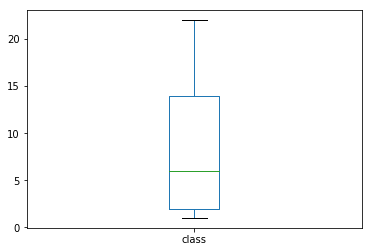

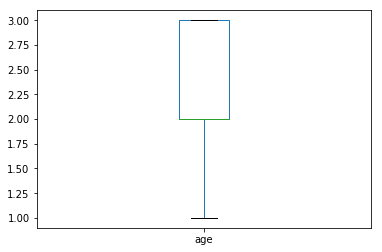

In [10]:
# box and whisker plots
#dataset.plot(kind = 'box', subplots=True, layout=(2,2), sharex=False, sharey=False)
#plt.show()
import pandas as pd
import matplotlib.pyplot as plt

dataset['class'].plot(kind='box',layout=(2,2))
plt.show()
dataset['age'].plot(kind='box',layout=(2,2))
plt.show()

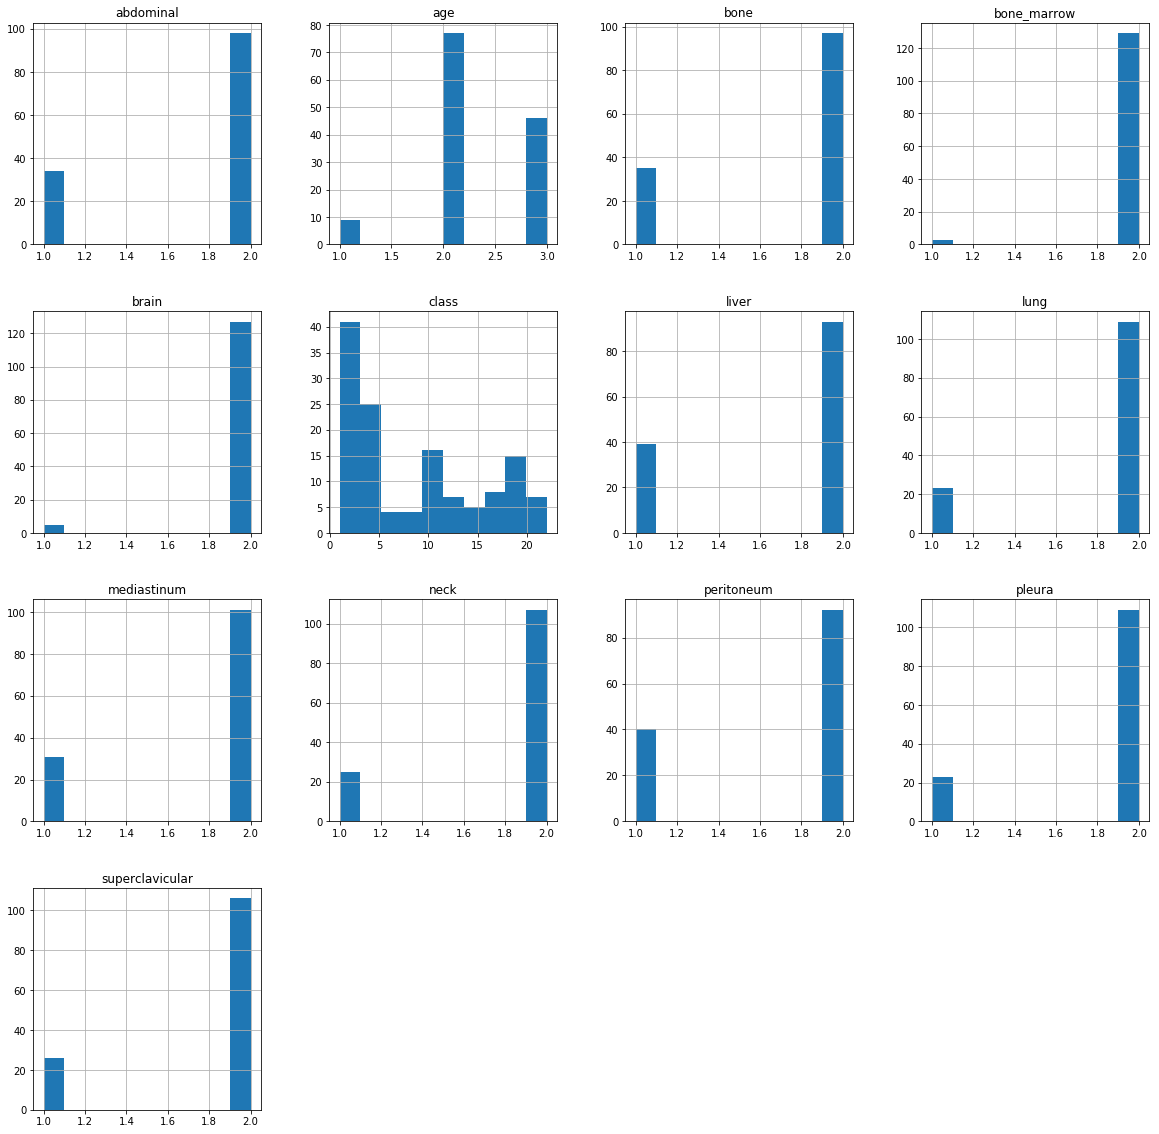

In [11]:
# histogram
dataset.hist(figsize=(20,20))
plt.show()

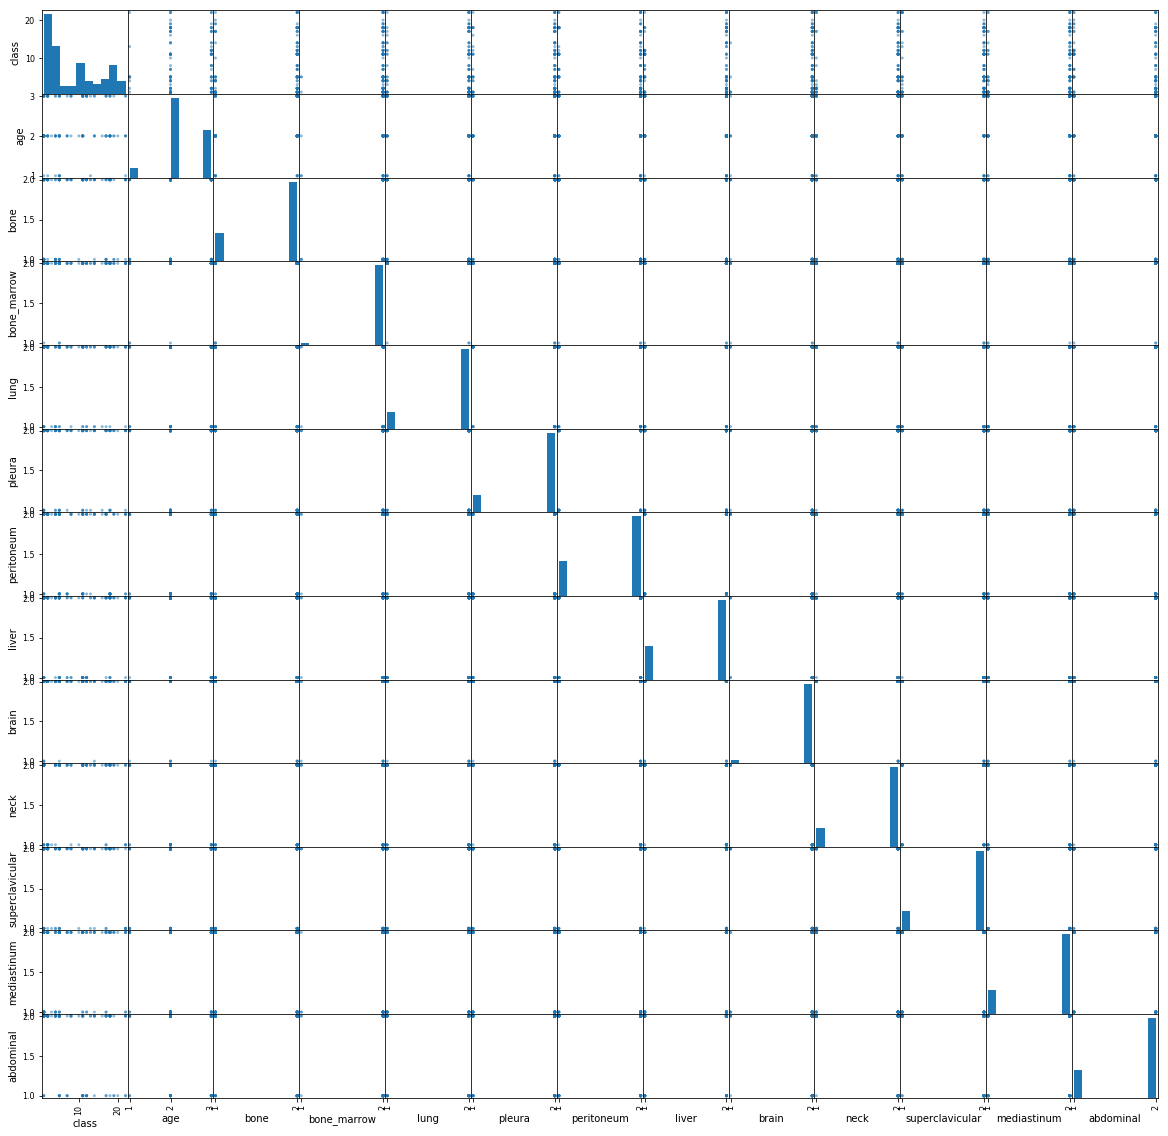

In [12]:
# scatter plot matrix
scatter_matrix(dataset,figsize=(20,20))
plt.show()

In [17]:
ds = dataset
sa = ["bone","bone_marrow","lung","pleura","peritoneum","liver","brain","skin","neck","superclavicular","axillar","mediastinum","abdominal"]
for a in sa:
    ds.drop(a,axis=1,inplace=True)

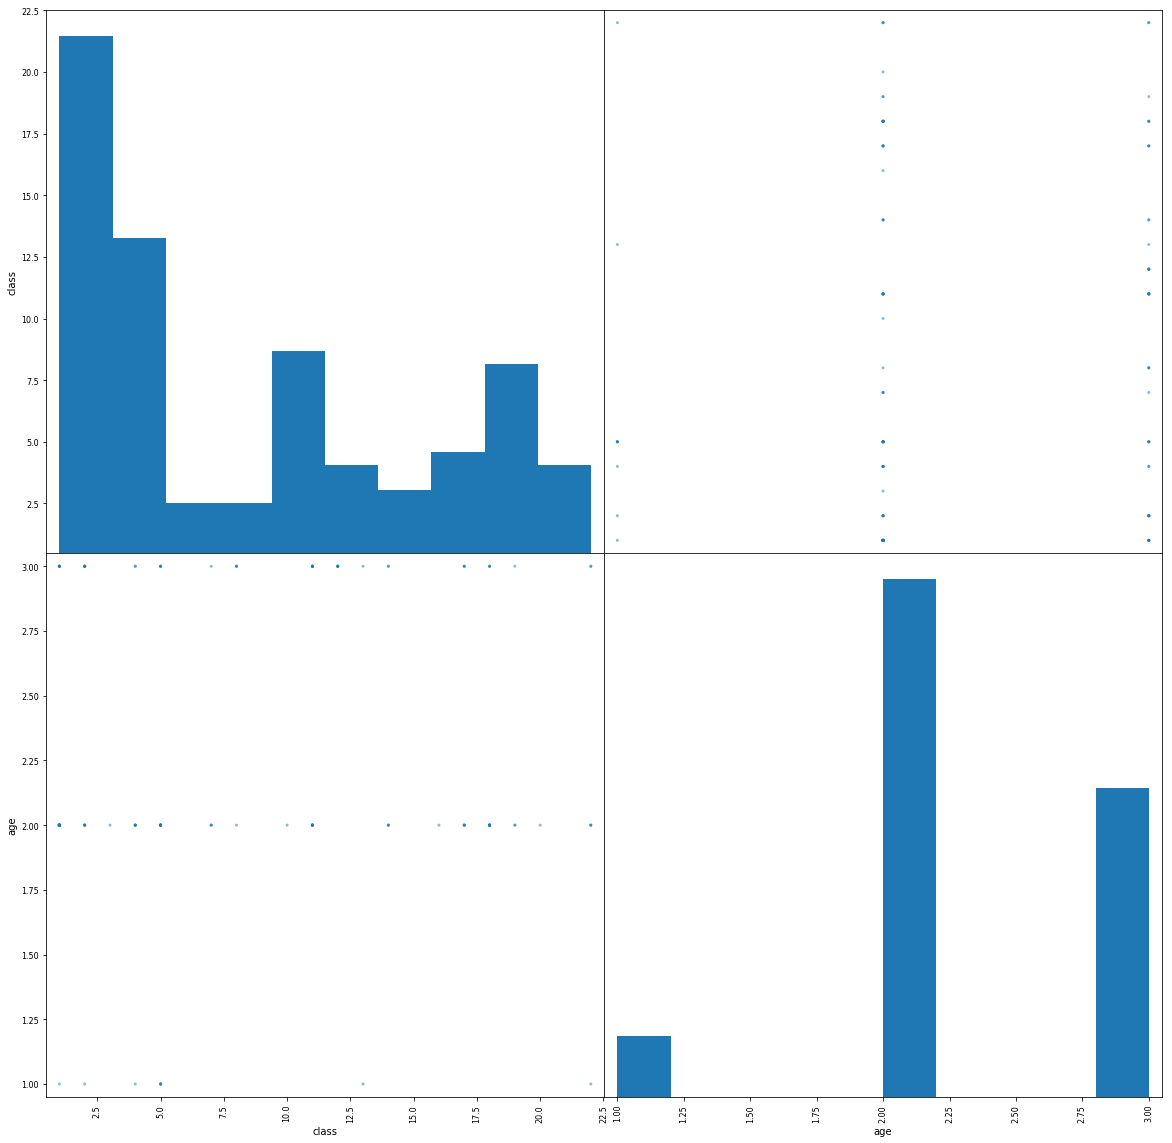

In [20]:
# scatter plot matrix
scatter_matrix(ds,figsize=(20,20))
plt.show()

In [22]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [23]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [24]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.390000 (0.124678)
LDA: 0.408182 (0.148014)
KNN: 0.520909 (0.143224)
CART: 0.465455 (0.148813)
NB: 0.482727 (0.208832)
SVM: 0.563636 (0.150316)


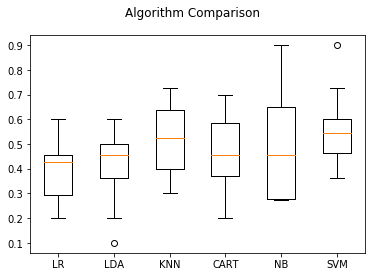

In [25]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [28]:
# Make predictions on validation dataset
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6666666666666666
[[13  0  3]
 [ 4  1  1]
 [ 1  0  4]]
              precision    recall  f1-score   support

           1       0.72      0.81      0.76        16
           2       1.00      0.17      0.29         6
           3       0.50      0.80      0.62         5

   micro avg       0.67      0.67      0.67        27
   macro avg       0.74      0.59      0.56        27
weighted avg       0.74      0.67      0.63        27

